## Decision Tree Examples

In [40]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Train and fine-tune a decision tree for the moons dataset

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=11)

X

array([[-0.08249495,  0.82027746],
       [ 0.46309398, -0.40897423],
       [ 1.47633062, -0.70893904],
       ...,
       [ 0.9566114 , -0.34046933],
       [ 0.46868755,  0.14314447],
       [-0.37721704,  0.21534513]])

In [3]:
def plot_binary_data_set(X, y):
    plt.figure(figsize=(8,4))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.show()

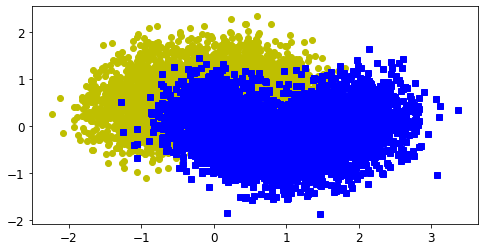

In [4]:
plot_binary_data_set(X, y)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

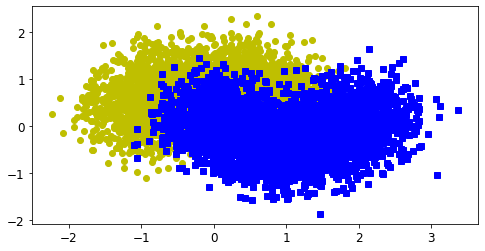

In [6]:
plot_binary_data_set(X_train, y_train)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=11)
param_grid = {
    "criterion": [ "gini", "entropy" ],
    "max_leaf_nodes": [20, 40, 80, 160, 320, 640, 1280, 2560, 5120, None],
    "max_depth": [4, 6, 8, 10, 12, 14, 20, None],
    "min_samples_split": [2, 3, 4],
}

dt_clf_grid_search = GridSearchCV(dt_clf, param_grid, n_jobs=-1, verbose=1, cv=3)

In [8]:
dt_clf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    4.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=11,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [9]:
dt_clf_grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [10]:
from sklearn.metrics import accuracy_score

y_pred = dt_clf_grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.8615

In [11]:
y_pred = dt_clf_grid_search.predict(X_train)
accuracy_score(y_train, y_pred)

0.854875

### Grow a forest

In [84]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, random_state=11, train_size=100)
split_sets = rs.split(X_train)

In [85]:
from sklearn.base import clone

trained_dt_clfs = []
accuracy_results = []

for s in split_sets:
    dt_clf = clone(dt_clf_grid_search.best_estimator_)
    dt_clf.fit(X_train[s[0]], y_train[s[0]])
    y_pred = dt_clf.predict(X_test)
    accuracy_results.append(accuracy_score(y_test, y_pred))
    trained_dt_clfs.append(dt_clf)

In [86]:
np.mean(accuracy_results)

0.8072505

In [87]:
from scipy import stats

prediction_list = []
for dt_clf in trained_dt_clfs:
    prediction_list.append(dt_clf.predict(X_test))

In [88]:
print(prediction_list[0].shape)

(2000,)


In [89]:
stats.mode(prediction_list, axis=0).mode.ravel()

array([0, 1, 1, ..., 1, 1, 1])

In [90]:
composite_predictions = stats.mode(prediction_list, axis=0).mode.ravel()

accuracy_score(y_test, composite_predictions)

0.8655